## SPEECH STRESS DETECTION


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path)

100%|██████████| 429M/429M [00:03<00:00, 131MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


## Training an LSTM model on the RAVDESS dataset for speech stress detection.

This code trains an LSTM (Long Short-Term Memory) model to recognize emotions from speech using the RAVDESS dataset. It extracts MFCC (Mel-Frequency Cepstral Coefficients) as features from audio files and classifies speech into one of 8 emotion categories.

In [ ]:
import tensorflow as tf
import numpy as np
import librosa
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load RAVDESS dataset
def load_ravdess_dataset(dataset_path):
    audio_data = []
    labels = []

    for file in glob.glob(os.path.join(dataset_path, "**/*.wav"), recursive=True):
        filename = os.path.basename(file)  # Extract only the filename
        parts = filename.split("-")

        # Debugging
        print(f"Processing file: {filename}, Split parts: {parts}")

        try:
            label = int(parts[2]) - 1  # Extract the emotion label (1-8) and convert to 0-7
        except ValueError:
            print(f"Skipping file: {filename} (invalid format)")
            continue

        signal, sr = librosa.load(file, sr=22050)
        mfcc = extract_mfcc(signal, sr)
        audio_data.append(mfcc)
        labels.append(label)

    return np.array(audio_data), np.array(labels)

# Extract MFCC features with normalization
def extract_mfcc(audio, sr=22050):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    scaler = MinMaxScaler()
    mfccs_scaled = scaler.fit_transform(mfccs)  # Normalize MFCC
    return np.mean(mfccs_scaled.T, axis=0)  # Average across time axis

# Prepare dataset
def prepare_data(dataset_path):
    audio_data, labels = load_ravdess_dataset(dataset_path)
    X_train, X_test, y_train, y_test = train_test_split(audio_data, labels, test_size=0.2, random_state=42)

    # Reshape for LSTM: (samples, timesteps=1, features=13)
    X_train = np.expand_dims(X_train, axis=1)
    X_test = np.expand_dims(X_test, axis=1)

    return X_train, X_test, y_train, y_test

# Train LSTM model
def train_lstm_model(X_train, y_train, X_test, y_test):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(1, 13)),  # Fixed shape
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(8, activation='softmax')  # 8 emotion classes
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
    return model

# Save trained model
def save_model(model, model_path):
    model.save(model_path)

# Main execution
def main():
    dataset_path = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"
    X_train, X_test, y_train, y_test = prepare_data(dataset_path)
    model = train_lstm_model(X_train, y_train, X_test, y_test)
    save_model(model, "speech_stress_model.keras")  # Use .keras format
    print("✅ Model training complete and saved!")

if __name__ == "__main__":
    main()


Processing file: 03-01-04-02-01-02-23.wav, Split parts: ['03', '01', '04', '02', '01', '02', '23.wav']
Processing file: 03-01-03-02-01-02-23.wav, Split parts: ['03', '01', '03', '02', '01', '02', '23.wav']
Processing file: 03-01-08-01-01-01-23.wav, Split parts: ['03', '01', '08', '01', '01', '01', '23.wav']
Processing file: 03-01-06-01-02-01-23.wav, Split parts: ['03', '01', '06', '01', '02', '01', '23.wav']
Processing file: 03-01-03-01-02-02-23.wav, Split parts: ['03', '01', '03', '01', '02', '02', '23.wav']
Processing file: 03-01-02-02-02-01-23.wav, Split parts: ['03', '01', '02', '02', '02', '01', '23.wav']
Processing file: 03-01-03-01-01-01-23.wav, Split parts: ['03', '01', '03', '01', '01', '01', '23.wav']
Processing file: 03-01-01-01-01-01-23.wav, Split parts: ['03', '01', '01', '01', '01', '01', '23.wav']
Processing file: 03-01-06-02-02-02-23.wav, Split parts: ['03', '01', '06', '02', '02', '02', '23.wav']
Processing file: 03-01-08-02-02-01-23.wav, Split parts: ['03', '01', '08'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1229 - loss: 2.0752 - val_accuracy: 0.1267 - val_loss: 2.0640
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1150 - loss: 2.0606 - val_accuracy: 0.1233 - val_loss: 2.0623
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1365 - loss: 2.0643 - val_accuracy: 0.1059 - val_loss: 2.0626
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1551 - loss: 2.0604 - val_accuracy: 0.1059 - val_loss: 2.0651
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1444 - loss: 2.0682 - val_accuracy: 0.1267 - val_loss: 2.0614
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1491 - loss: 2.0602 - val_accuracy: 0.1128 - val_loss: 2.0641
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1416 - loss: 2.0540 - val_accuracy: 0.1059 - val_loss: 2.0622
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1370 - loss: 2.0685 - val_accuracy: 0.1059 - val_loss: 2.0633
Ep

 ## Convert Model to TensorFlow Lite (TFLite)

In [ ]:
import tensorflow as tf

# Load the trained Keras model
model = tf.keras.models.load_model("speech_stress_model.h5")

# Recompile the model (optional)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Model loaded and compiled successfully!")


Model loaded and compiled successfully!


This code is designed for Speech Emotion Recognition (SER) using the RAVDESS dataset. It processes audio files, extracts features, trains an LSTM-based deep learning model, and saves it for later inference.

Converting a TensorFlow (Keras) model to TensorFlow Lite (TFLite) makes the model optimized for deployment on edge devices, such as:
1. Mobile Phones (Android, iOS)
2. Embedded Systems (Raspberry Pi, Jetson Nano)
3. IoT Devices (ESP32, microcontrollers)

In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("speech_stress_model.keras")

# Create a TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable resource variables (fix TensorListReserve issue)
converter.experimental_enable_resource_variables = True

# Allow TensorFlow ops for unsupported TFLite layers
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Default TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow TensorFlow ops (for LSTM)
]

# Fix tensor list conversion issue
converter._experimental_lower_tensor_list_ops = False

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open("speech_stress_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted to TensorFlow Lite!")


Saved artifact at '/tmp/tmpkshjdx37'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1, 13), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  132518325148880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325147152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325146576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325147344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325145424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325149840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325150032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132518325150608: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model successfully converted to TensorFlow Lite!


## MOTION ANOMALY DETECTION

##DATA COLLECTION AND PREPROCESSING

Load MotionSense dataset and check available files.




Extract accelerometer & gyroscope data.

Normalize data using MinMaxScaler.

Create sliding windows (100 samples per window).

Split train-test (70% for training).

Train LSTM Autoencoder (for normal motion).

Train One-Class SVM (for anomaly detection).

Convert LSTM model to TensorFlow Lite (for mobile).

**MOBI ACT DATASET**

 Includes accelerometer and gyroscope data from smartphones.
Contains fall detection scenarios, which are useful for identifying distress situations.
Activities include walking, running, jumping, sitting, standing, and simulated falls (forward, backward, sideward, etc.).


Why it fits OUR project?

Best for detecting emergency situations, like sudden falls or rapid movement changes.
Can help train the model to distinguish between normal and distress movements.

MobiAct dataset files contain motion data from phone sensors, including acceleration (BSC_acc), gyroscope (BSC_gyro), and orientation (BSC_ori). Each file follows a structured format:

Acceleration Data (BSC_acc_x_x.txt):

Columns: timestamp (ns), x, y, z (m/s^2)
Represents acceleration forces including gravity along x, y, and z axes​
​
​
.
Gyroscope Data (BSC_gyro_x_x.txt):

Columns: timestamp (ns), x, y, z (rad/s)
Represents the rate of rotation around the x, y, and z axes​
​
​
.
Orientation Data (BSC_ori_x_x.txt):

Columns: timestamp (ns), Azimuth, Pitch, Roll (degrees)
Represents the phone's orientation in space​


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BSC_acc_10_2.txt to BSC_acc_10_2.txt
Saving BSC_acc_10_3.txt to BSC_acc_10_3.txt
Saving BSC_gyro_10_1.txt to BSC_gyro_10_1.txt
Saving BSC_gyro_10_2.txt to BSC_gyro_10_2.txt
Saving BSC_gyro_10_3.txt to BSC_gyro_10_3.txt
Saving BSC_ori_10_1.txt to BSC_ori_10_1.txt
Saving BSC_ori_10_2.txt to BSC_ori_10_2.txt
Saving BSC_ori_10_3.txt to BSC_ori_10_3.txt
Saving BSC_acc_10_1.txt to BSC_acc_10_1.txt


In [ ]:
import os
print(os.listdir("/content/"))  # List all files in the working directory



['.config', 'BSC_ori_10_3.txt', 'BSC_gyro_10_1.txt', 'BSC_gyro_10_2.txt', 'BSC_ori_10_2.txt', 'BSC_acc_10_3.txt', 'BSC_acc_10_2.txt', 'BSC_ori_10_1.txt', 'BSC_gyro_10_3.txt', 'BSC_acc_10_1.txt', 'sample_data']


In [ ]:
print(uploaded.keys())  # Lists all uploaded file names


dict_keys(['BSC_acc_10_2.txt', 'BSC_acc_10_3.txt', 'BSC_gyro_10_1.txt', 'BSC_gyro_10_2.txt', 'BSC_gyro_10_3.txt', 'BSC_ori_10_1.txt', 'BSC_ori_10_2.txt', 'BSC_ori_10_3.txt', 'BSC_acc_10_1.txt'])


In [ ]:
import pandas as pd

# Load data with correct paths
acc_data = pd.read_csv("/content/BSC_acc_10_1.txt", comment='#', header=None, names=['timestamp', 'x_acc', 'y_acc', 'z_acc'])
gyro_data = pd.read_csv("/content/BSC_gyro_10_1.txt", comment='#', header=None, names=['timestamp', 'x_gyro', 'y_gyro', 'z_gyro'])
ori_data = pd.read_csv("/content/BSC_ori_10_1.txt", comment='#', header=None, names=['timestamp', 'azimuth', 'pitch', 'roll'])

print(acc_data.head())  # Verify if data loads correctly


       timestamp     x_acc     y_acc     z_acc
0          @DATA       NaN       NaN       NaN
1  1295402758000 -1.407790  9.615114 -2.087744
2  1295602895000 -1.369483  9.557653 -2.001553
3  1295803728000 -1.244985  9.634268 -2.097321
4  1296006834000 -1.283292  9.624691 -2.039860


Load and Explore Data in Python

In [ ]:
import pandas as pd

# File paths
acc_file = "/content/BSC_acc_10_1.txt"
gyro_file = "/content/BSC_gyro_10_1.txt"
ori_file = "/content/BSC_ori_10_1.txt"

# Function to load sensor data while skipping metadata
def load_sensor_data(file_path, column_names):
    return pd.read_csv(file_path, comment='#', header=None, names=column_names, skiprows=1)

# Load data properly
acc_data = load_sensor_data(acc_file, ['timestamp', 'x_acc', 'y_acc', 'z_acc'])
gyro_data = load_sensor_data(gyro_file, ['timestamp', 'x_gyro', 'y_gyro', 'z_gyro'])
ori_data = load_sensor_data(ori_file, ['timestamp', 'azimuth', 'pitch', 'roll'])

# Ensure 'timestamp' is numeric before converting
acc_data = acc_data[pd.to_numeric(acc_data['timestamp'], errors='coerce').notna()]
gyro_data = gyro_data[pd.to_numeric(gyro_data['timestamp'], errors='coerce').notna()]
ori_data = ori_data[pd.to_numeric(ori_data['timestamp'], errors='coerce').notna()]

# Convert timestamp to datetime
acc_data['timestamp'] = pd.to_datetime(acc_data['timestamp'].astype(int), unit='ns')
gyro_data['timestamp'] = pd.to_datetime(gyro_data['timestamp'].astype(int), unit='ns')
ori_data['timestamp'] = pd.to_datetime(ori_data['timestamp'].astype(int), unit='ns')

# Print the first few rows
print(acc_data.head())
print(gyro_data.head())
print(ori_data.head())


                   timestamp     x_acc     y_acc     z_acc
1 1970-01-01 00:21:35.402758 -1.407790  9.615114 -2.087744
2 1970-01-01 00:21:35.602895 -1.369483  9.557653 -2.001553
3 1970-01-01 00:21:35.803728 -1.244985  9.634268 -2.097321
4 1970-01-01 00:21:36.006834 -1.283292  9.624691 -2.039860
5 1970-01-01 00:21:36.020257 -1.254562  9.672575 -2.049437
                   timestamp    x_gyro    y_gyro    z_gyro
1 1970-01-01 00:21:35.300375  5.700900  8.943068  8.509353
2 1970-01-01 00:21:35.305317  5.700900  0.748310  0.033292
3 1970-01-01 00:21:35.310324 -1.184468  0.758084  0.037568
4 1970-01-01 00:21:35.315348 -1.189355  0.756251  0.039095
5 1970-01-01 00:21:35.320311 -1.197601  0.747394  0.039401
                   timestamp    azimuth      pitch      roll
1 1970-01-01 00:21:35.300375  105.63398 -24.657568 -6.744515
2 1970-01-01 00:21:35.305317  108.72327 -24.557203 -5.664876
3 1970-01-01 00:21:35.310324  104.84894 -25.342705 -7.173953
4 1970-01-01 00:21:35.315348  104.16071 -27.7880

Synchronizing the Data

Since data from different sensors have slightly different timestamps, use interpolation or resampling to align them.

In [ ]:
# Merge datasets based on timestamp (nearest match)
merged_data = pd.merge_asof(acc_data, gyro_data, on="timestamp")
merged_data = pd.merge_asof(merged_data, ori_data, on="timestamp")

print(merged_data.head())


                   timestamp     x_acc     y_acc     z_acc    x_gyro  \
0 1970-01-01 00:21:35.402758 -1.407790  9.615114 -2.087744 -0.984409   
1 1970-01-01 00:21:35.602895 -1.369483  9.557653 -2.001553 -0.017104   
2 1970-01-01 00:21:35.803728 -1.244985  9.634268 -2.097321 -0.020769   
3 1970-01-01 00:21:36.006834 -1.283292  9.624691 -2.039860  0.017104   
4 1970-01-01 00:21:36.020257 -1.254562  9.672575 -2.049437  0.016799   

     y_gyro    z_gyro    azimuth      pitch       roll  
0  0.467312  0.091324  93.310250 -36.316100 -11.622672  
1 -0.019853  0.014355  78.769040 -61.887928 -10.473008  
2 -0.008247  0.009774  69.344055 -75.774510  -7.848774  
3 -0.021686  0.005192  62.325010 -83.404070  -5.489289  
4 -0.016799  0.001527  62.030890 -83.642770  -5.392573  


Labeling the Data

Each file contains an Activity Label (e.g., 12 - Back Sitting Chair). You need to map these labels to their respective motion categories (e.g., Normal or Distress).

In [ ]:
# Define activity mapping
activity_mapping = {12: "Normal"}  # Extend for distress movements

# Assign labels
merged_data["activity"] = "Normal"  # Modify based on activity type


Feature Extraction

For machine learning, calculate relevant motion features:

Mean, Variance, Peak Values
Fast Fourier Transform (FFT) for Frequency Analysis
Standard Deviation, RMS Energy

In [ ]:
features = merged_data[['x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro']].agg(['mean', 'std', 'max', 'min'])
print(features)


          x_acc      y_acc      z_acc    x_gyro    y_gyro    z_gyro
mean   6.864903   0.516685   3.618311 -0.114998  0.028236  0.159223
std    3.137115   4.793706   2.427031  0.430404  0.253668  0.840246
max   12.277467  12.334928  12.794614  1.178054  2.078164  3.411682
min   -1.465251 -19.124884  -2.221819 -2.639854 -1.320691 -6.883535


Visualizing Data

Use Matplotlib to visualize patterns:


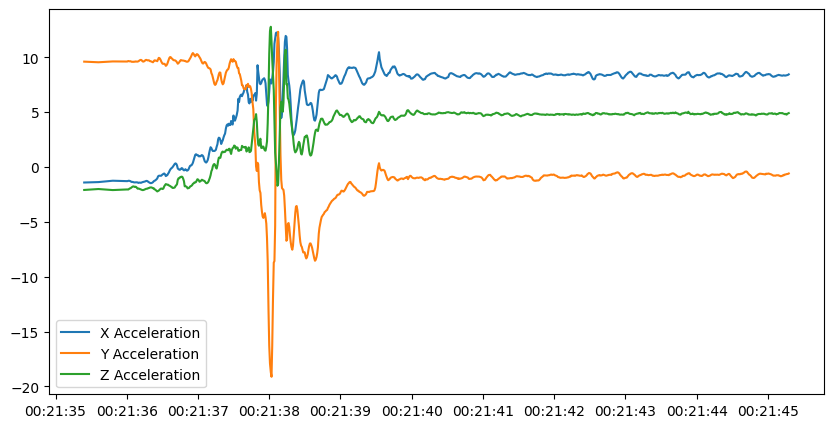

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(merged_data['timestamp'], merged_data['x_acc'], label='X Acceleration')
plt.plot(merged_data['timestamp'], merged_data['y_acc'], label='Y Acceleration')
plt.plot(merged_data['timestamp'], merged_data['z_acc'], label='Z Acceleration')
plt.legend()
plt.show()


 Normalize Data Using MinMaxScaler

Since LSTMs work best with normalized data, scale everything between 0 and 1:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select only feature columns (excluding timestamps and labels)
feature_columns = ['x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro']  # Add extracted features

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(merged_data[feature_columns])  # Assuming merged_data is your final dataset

# Convert back to DataFrame
normalized_data = pd.DataFrame(scaled_features, columns=feature_columns)
normalized_data['timestamp'] = merged_data['timestamp']
normalized_data['activity'] = merged_data['activity']  # Keep labels


Create Sliding Windows (100 samples per window)

For time-series models like LSTM, we need to create overlapping sequences of 100 samples per window.

In [ ]:
def create_sliding_windows(data, window_size=100):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data.iloc[i:i+window_size, :-2].values)  # Exclude timestamp & activity
        labels.append(data.iloc[i+window_size-1, -1])  # Use last label in window

    return np.array(sequences), np.array(labels)

# Create windows
X, y = create_sliding_windows(normalized_data, window_size=100)


Train-Test Split (70%-30%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train LSTM Autoencoder for Normal Motion Detection

LSTM Autoencoder is trained only on normal motion to detect anomalies.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(100, X_train.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(100),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 100, 6)              │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,134 (250.52 KB)

 Trainable params: 64,134 (250.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 539ms/step - loss: 0.3232 - val_loss: 0.0740
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - loss: 0.1309 - val_loss: 0.1878
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - loss: 0.1696 - val_loss: 0.0541
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.0486 - val_loss: 0.0377
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0357 - val_loss: 0.0338
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - loss: 0.0334 - val_loss: 0.0316
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0314 - val_loss: 0.0304
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 347ms/step - loss: 0.0301 - val_loss: 0.0289
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - loss: 0.0278 - val_loss: 0.0256
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - loss: 0.0250 - val_loss: 0.0235
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/st

Train One-Class SVM for Anomaly Detection
We use only normal data to train One-Class SVM.

In [ ]:
from sklearn.svm import OneClassSVM

# Flatten data for One-Class SVM
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Train One-Class SVM
svm = OneClassSVM(kernel="rbf", gamma="auto").fit(X_train_flatten)

# Predict anomalies
y_pred = svm.predict(X_test_flatten)
y_pred = [1 if x == 1 else -1 for x in y_pred]  # Convert to anomaly labels


Convert LSTM Model to TensorFlow Lite
For mobile deployment, convert the trained model to TensorFlow Lite:

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable resource variables (fixes TensorListReserve error)
converter.experimental_enable_resource_variables = True

# Allow TensorFlow ops (fixes TensorArray issues)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Default TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow some TensorFlow ops
]

# Disable lowering of tensor list ops
converter._experimental_lower_tensor_list_ops = False

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open("lstm_autoencoder.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model successfully converted!")


Saved artifact at '/tmp/tmptx30fcq4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 100, 6), dtype=tf.float32, name=None)
Captures:
  133705243034256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243034832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243034640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243035984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243033872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243037136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243036176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243037712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243038288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133705243037328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13370524303905

## Automate Hyperparameter Search with KerasTuner

Use KerasTuner to find the best combination automatically.

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


## Hyperparameter Tuning for LSTM Autoencoder

 What this does:

Tests different LSTM units, dropout rates, and learning rates
Finds the best combination automatically
Retrains the model using the best settings

Key Hyperparameters to Tune
Number of LSTM Layers & Units

Too many units → Overfitting
Too few units → Poor learning
Common choices: [32, 64, 128]
Batch Size

Small batch (16, 32) → Better generalization
Large batch (64, 128) → Faster training
Learning Rate (0.001 - 0.0001)

Too high → Won't converge
Too low → Slow training
Dropout (0.1 - 0.5)

Prevents overfitting in LSTM layers

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout
import tensorflow as tf

# Define the model function
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int("units1", min_value=32, max_value=128, step=32), activation='relu', return_sequences=True, input_shape=(100, X_train.shape[2])),
        Dropout(hp.Float("dropout1", min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(hp.Int("units2", min_value=32, max_value=128, step=32), activation='relu', return_sequences=False),
        RepeatVector(100),
        LSTM(hp.Int("units3", min_value=32, max_value=128, step=32), activation='relu', return_sequences=True),
        Dropout(hp.Float("dropout2", min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(hp.Int("units4", min_value=32, max_value=128, step=32), activation='relu', return_sequences=True),
        TimeDistributed(Dense(X_train.shape[2]))
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='mse')

    return model

# Define tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different combinations to try
    executions_per_trial=2,  # Number of times to train each model
    directory='tuning_results',
    project_name='LSTM_tuning'
)

# Start tuning
tuner.search(X_train, X_train, epochs=20, validation_split=0.1, batch_size=32)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Train model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, X_train, epochs=50, validation_split=0.1, batch_size=32)


Trial 10 Complete [00h 06m 49s]
val_loss: 0.00741883902810514

Best val_loss So Far: 0.006766880629584193
Total elapsed time: 00h 59m 20s
Best Hyperparameters: {'units1': 64, 'dropout1': 0.5, 'units2': 64, 'units3': 96, 'dropout2': 0.30000000000000004, 'units4': 64, 'learning_rate': 0.001}
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 419ms/step - loss: 0.2728 - val_loss: 0.1509
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 0.0955 - val_loss: 0.0497
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - loss: 0.0387 - val_loss: 0.0365
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - loss: 0.0325 - val_loss: 0.0325
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - loss: 0.0313 - val_loss: 0.0290
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - loss: 0.0255 - val_loss: 0.0264
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - loss: 0.0243 - val_loss: 0.0263
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - loss: 0.0229 - val_loss: 0.0249
Epoch 9/50
16/16 ━━━

## MODEL EVALUATION

Evaluate LSTM Autoencoder

Since this is an anomaly detection model, evaluate using Reconstruction Error.

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step


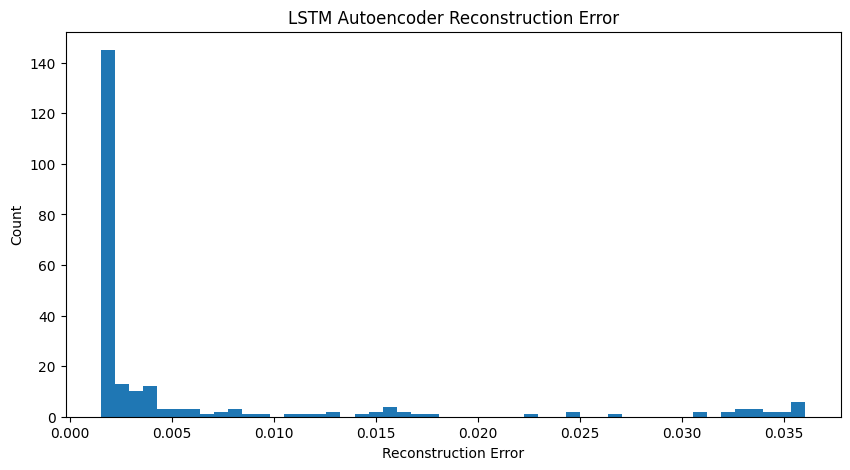

Anomaly Count: 12


In [ ]:
import numpy as np

# Predict on test data
X_pred = best_model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = np.mean(np.power(X_test - X_pred, 2), axis=(1, 2))

# Plot reconstruction error
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("LSTM Autoencoder Reconstruction Error")
plt.show()

# Set anomaly threshold
threshold = np.percentile(mse, 95)  # Set at 95th percentile

# Detect anomalies
anomalies = mse > threshold
print(f"Anomaly Count: {sum(anomalies)}")


## Hyperparameter Tuning for One-Class SVM

For One-Class SVM, tune the following:

Kernel Type (rbf, linear, poly)
nu (Anomaly Ratio)

Typical range: 0.01 - 0.1
Gamma (auto or scale)

auto: Uses 1/n_features
scale: Uses 1 / (n_features * X.var())

What this does:

Tests multiple kernel types, nu, and gamma values
Finds the best SVM configuration
Retrains the model with best settings

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer
import numpy as np

# Define parameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'nu': [0.01, 0.05, 0.1],
    'gamma': ['auto', 'scale']
}

# Custom scoring function for One-Class SVM
def anomaly_scorer(estimator, X):
    scores = estimator.decision_function(X)  # Higher values mean normal, lower means anomaly
    return np.mean(scores)  # Maximize the mean decision score

# Create a scorer for GridSearchCV
scorer = make_scorer(anomaly_scorer, greater_is_better=True)

# One-Class SVM model
svm = OneClassSVM()

# Apply GridSearchCV with custom scoring
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring=scorer, verbose=2)

# Fit on training data
grid_search.fit(X_train_flatten)

# Print best hyperparameters
print("Best SVM Hyperparameters:", grid_search.best_params_)

# Train the best model
best_svm = OneClassSVM(**grid_search.best_params_)
best_svm.fit(X_train_flatten)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ....................gamma=auto, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ....................gamma=auto, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ....................gamma=auto, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ....................gamma=auto, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END ....................gamma=auto, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END ....................gamma=auto, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END .....................gamma=auto, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END .....................gamma=auto, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END .....................gamma=auto, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END .................gamma=auto, kernel=linear, nu=0.01; total time=   0.0s
[CV] END .................gamma=auto, kernel=linear, nu=0.01; total time=   0.0s
[CV] END .................gamma=auto, kernel=lin

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV] END .................gamma=auto, kernel=linear, nu=0.05; total time=   0.0s
[CV] END .................gamma=auto, kernel=linear, nu=0.05; total time=   0.0s
[CV] END .................gamma=auto, kernel=linear, nu=0.05; total time=   0.0s
[CV] END ..................gamma=auto, kernel=linear, nu=0.1; total time=   0.0s
[CV] END ..................gamma=auto, kernel=linear, nu=0.1; total time=   0.0s
[CV] END ..................gamma=auto, kernel=linear, nu=0.1; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ...................gamma=auto, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV] END ....................gamma=auto, kernel=poly, nu=0.1; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.01; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END ...................gamma=scale, kernel=rbf, nu=0.05; total time=   0.0s
[CV] END ....................gamma=scale, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END ....................gamma=scale, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END ....................gamma=scale, kernel=rbf, nu=0.1; total time=   0.0s
[CV] END ................gamma=scale, kernel=linear, nu=0.01; total time=   0.0s
[CV] END ................gamma=scale, kernel=linear, nu=0.01; total time=   0.0s
[CV] END ................gam

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV] END ................gamma=scale, kernel=linear, nu=0.05; total time=   0.0s
[CV] END .................gamma=scale, kernel=linear, nu=0.1; total time=   0.0s
[CV] END .................gamma=scale, kernel=linear, nu=0.1; total time=   0.0s
[CV] END .................gamma=scale, kernel=linear, nu=0.1; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.01; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ..................gamma=scale, kernel=poly, nu=0.05; total time=   0.0s
[CV] END ...................gamma=scale, kernel=poly, nu=0.1; total time=   0.0s
[CV] END ...................gamma=scale, kernel=poly, nu=0.1; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

OneClassSVM(gamma='auto', nu=0.01)

In [ ]:
# Train the final One-Class SVM model with best parameters
best_svm = OneClassSVM(gamma='auto', nu=0.01)
best_svm.fit(X_train_flatten)

# Save the trained model
import joblib
joblib.dump(best_svm, "best_one_class_svm.pkl")

print("✅ Best One-Class SVM model saved successfully!")


✅ Best One-Class SVM model saved successfully!


In [ ]:
# Predict anomalies on test data
y_pred = best_svm.predict(X_test_flatten)

# Convert predictions (-1 = anomaly, 1 = normal)
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Print the number of anomalies detected
print(f"🚨 Anomalies Detected: {sum(np.array(y_pred_binary) == 0)}")


🚨 Anomalies Detected: 9


## EvaluateD  One-Class SVM with Classification Report and Accuracy

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Ensure y_test is numerical (convert string labels if needed)
# Assuming normal is "Normal" and anomaly is "Anomaly" (update based on your dataset)
y_test_numeric = np.where(np.array(y_test) == "Normal", 1, 0)  # Convert strings to 1 (normal) and 0 (anomaly)

# Predict anomalies (-1 means anomaly, 1 means normal)
y_pred = best_svm.predict(X_test_flatten)

# Convert predictions to binary (1=normal, 0=anomaly)
y_pred_binary = np.where(y_pred == 1, 1, 0)

# Ensure y_test and y_pred_binary have the same type and shape
y_test_numeric = y_test_numeric.astype(int)
y_pred_binary = y_pred_binary.astype(int)

# Evaluate the model
print("✅ SVM Classification Report:")
print(classification_report(y_test_numeric, y_pred_binary))
print(f"✅ Accuracy: {accuracy_score(y_test_numeric, y_pred_binary) * 100:.2f}%")


✅ SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98       237

    accuracy                           0.96       237
   macro avg       0.50      0.48      0.49       237
weighted avg       1.00      0.96      0.98       237

✅ Accuracy: 96.20%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import files
files.download("lstm_autoencoder.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Mobile App Backend Architecture

Key Components

Mobile Sensors: Get real-time accelerometer & gyroscope data.


Edge AI Model (TensorFlow Lite/PyTorch Mobile): Run on-device AI detection.

Backend Server (Flask/FastAPI): Process real-time alerts.

SOS Triggering: Send distress signals via SMS, WhatsApp, or Call.